<img src="https://www.python.org/static/img/python-logo.png" width="300" alt="Python logo"  />
<font color='blue'>
$\Large\text{Pontificia Universidad Católica del Perú}$</font>

$$\Large \textit{Estadística Aplicada}$$

$$\large\textbf{Trabajo Grupal Clase 09: Toma de decisiones estadísticas}$$

_Integrantes:_

*   Lucia Dayhana Garcia Murguia
*   Carlos Varas Tello
*   Julia Ximena Huaman Alfaro
*   Milko César Rodriguez Arellano
*   Paul Oliver Mateo Rodulfo
___

# Actividad grupal

Caso de estudio: **"Base financiera"**

Haciendo uso de la base entregada desarrollar los siguientes items:


Total de puntos (20 ptos)


### **Paso 1**
1. Carga y muestreo. **(4ptos)**
  *   Cargar la base de datos para la actividad.
  *   Hacer un muestreo aleatorio simple de 1000 clientes
  *   Hacer un muestreo sistematico con inicio aleatorio de 1000 clientes
  *   Hacer un muestreo estratificado de 1000 clientes (eligiendo una variable con categorias o estratos)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
#visualizacion dataframe
pd.options.display.max_rows=500
pd.options.display.max_columns=500

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Base_financiera_f.csv to Base_financiera_f.csv


In [3]:
df = pd.read_csv('Base_financiera_f.csv', sep =',')
df.head()

,ID,Edad,Estado_civil,Genero,Zona_geografica,Ingreso,Numero_entidades_sbs,Tenencia_Saldo_rcc,Tenencia_prestamos_rcc,Tenencia_hipotecario_rcc,Saldo_tc_rcc,Saldo_prestamo_rcc,Saldo_hipotecario_rcc,deuda_rcc,Tenencia_TC_rcc,Nro_bancos_tc_saldo,Cantidad_productos_rcc,Nro_bancos_pld,Nro_productos_activo_E1,Nro_productos_activo_E2,Nro_productos_activo_E3,Nro_productos_activo_E4,Nro_productos_activo_rcc,Antiguedad_cliente,Tenencia_ahorros,Tenencia_cts,Tenencia_depo_plazo,Tenencia_FFMM,Saldo_vehicular_prom,Saldo_hipot_prom,Flg_transacc_atm_3m,Flg_transacc_ventanilla_3m,Flg_transacc_bca_internet_3m,Flg_transacc_bca_telef_3m,Flg_ph,Antiguedad_ph,Antiguedad_ahorros,Antiguedad_depo_plazo,Antiguedad_cts,Antiguedad_pasivos,Nro_productos_pasivos,Antiguedad_pld,Antiguedad_activos,Nro_meses_rcc,Tenencia_ahorros_6m,Tenencia_depo_plazo_6m,Tenencia_cts_6m,Tenencia_FFMM_6m,Nro_meses_visitaOficina_5M,cant_vecesvisitaoficina_5m,Target_mora
0,1,63,Casado,Femenino,LIMA MODERNA,1500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,161,1,0,0,0,0,0,1,1,0,0,0,0,109,0,0,109,1,0,0,59,1,0,0,1,3,4,SIN ATRASO
1,2,58,Soltero,Masculino,LIMA MODERNA,2500,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,107,1,0,0,0,0,0,0,1,1,0,0,0,30,0,0,30,1,0,0,96,1,0,0,0,3,3,SIN ATRASO
2,3,76,Casado,Masculino,LIMA MODERNA,0,3,1,0,0,0,0,0,0,1,3,1,0,1,0,0,0,1,240,0,0,0,0,0,0,0,0,0,0,0,0,113,0,0,113,1,0,0,98,0,0,0,0,0,0,SIN ATRASO
3,4,48,Casado,Masculino,LIMA MODERNA,10000,4,1,0,1,0,0,0,0,1,4,2,0,2,0,0,1,2,215,1,0,0,0,0,278080,0,0,1,0,0,0,34,0,0,34,1,0,33,32,1,1,0,0,0,0,SIN ATRASO
4,5,36,Soltero,Masculino,ORIENTE,13000,6,1,1,0,0,0,0,0,1,6,2,2,2,1,2,0,2,35,1,0,0,0,0,0,0,1,0,0,0,0,35,0,0,35,1,14,14,23,1,0,0,0,5,10,SIN ATRASO


In [4]:
# Muestreo simple
simple = df.sample(n=1000, random_state=1)

In [5]:
# Muestreo Sistemático
n = 1000
population = len(df)
interval = population // n
start = np.random.randint(0, interval)
indices = np.arange(start, start + n * interval, interval)[:n]
systematic = df.iloc[indices]

In [6]:
# Muestreo estratificado
from sklearn.model_selection import train_test_split
x = df.drop('Zona_geografica', axis = 1)
y = df['Zona_geografica']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1000, stratify = y, random_state=1)
stratified = pd.concat([x_test, y_test], axis=1)

### **Paso 2**
2. Identificar una variable cuantitativa y una variable cualitativa. La variable cualitativa debe tener 2 categorias desde su origen o creados por agrupación. En adelante estas 2 categorias serán llamados subgrupos **(4ptos)**
  * Obtener la media, mediana y moda por subgrupo para los clientes en la muestra y para la población total. Interpretar los resultados.

In [7]:
# Variable para subgrupos: Genero

# Media de la población
mean_pop = df.groupby('Genero')['Edad'].mean()
mean_pop

,Edad
Genero,
Femenino,52.435976
Masculino,51.886536


In [8]:
# Mediana de la población
median_pop = df.groupby('Genero')['Edad'].median()
median_pop

,Edad
Genero,
Femenino,51.0
Masculino,51.0


In [9]:
# Moda de la población
mode_pop = df.groupby('Genero')['Edad'].apply(lambda x: stats.mode(x)[0])
mode_pop

,Edad
Genero,
Femenino,39
Masculino,43


In [10]:
# Media de la muestra simple
mean_muestra = simple.groupby('Genero')['Edad'].mean()
mean_muestra

,Edad
Genero,
Femenino,52.794344
Masculino,52.260229


In [11]:
# Mediana de la muestra simple
median_muestra = simple.groupby('Genero')['Edad'].median()
median_muestra

,Edad
Genero,
Femenino,51.0
Masculino,51.0


In [12]:
# Moda de la muestra simple
mode_muestra = simple.groupby('Genero')['Edad'].apply(lambda x: stats.mode(x)[0])
mode_muestra

,Edad
Genero,
Femenino,44
Masculino,41


* Se puede observar que las medianas de las Edades para ambos subgrupos (Femenino y Masculino) en la muestra es la misma que en la población.
* Las medias de los subgrupos en la muestra son ligeramente mayores.
* La moda del género masculino disminuye en 2, mientras que en el género femenino incrementa en 5.

### **Paso 3**
3. Haciendo uso de la muestra y las 2 variables identificadas. **(4ptos)**
*   Hacer los gráficos de distribución de la variable continua por subgrupo, incluyendo la densidad de probabilidad normal. Interpretar los resultados.
*   Hacer los gráficos de distribución qq-plot por subgrupo. Interpretar los resultados.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

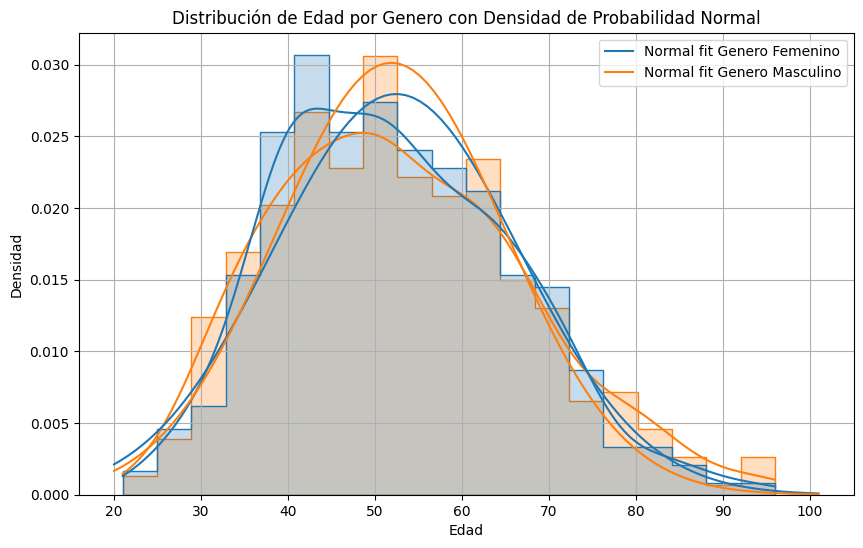

In [14]:
# Gráfico de la variable Edad
plt.figure(figsize=(10, 6))

# Graficar la distribución por subgrupo
sns.histplot(data=simple, x='Edad', hue='Genero', element='step', stat='density', common_norm=False, kde=True)

# Añadir la densidad de probabilidad normal
x = np.linspace(df['Edad'].min(), df['Edad'].max(), 100)
for grupo in df['Genero'].unique():
    subset = df[df['Genero'] == grupo]
    mu, std = norm.fit(subset['Edad'])
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, label=f'Normal fit Genero {grupo}')

plt.title('Distribución de Edad por Genero con Densidad de Probabilidad Normal')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

De los gráficos se puede observar que la distribución de los datos del subgrupo Femenino se aproxima más a una distribución normal, y ambos subgrupos tienen una media similar. Asimismo, el subgrupo Masculina presenta mayor presencia de outliers en el extremo derecho.

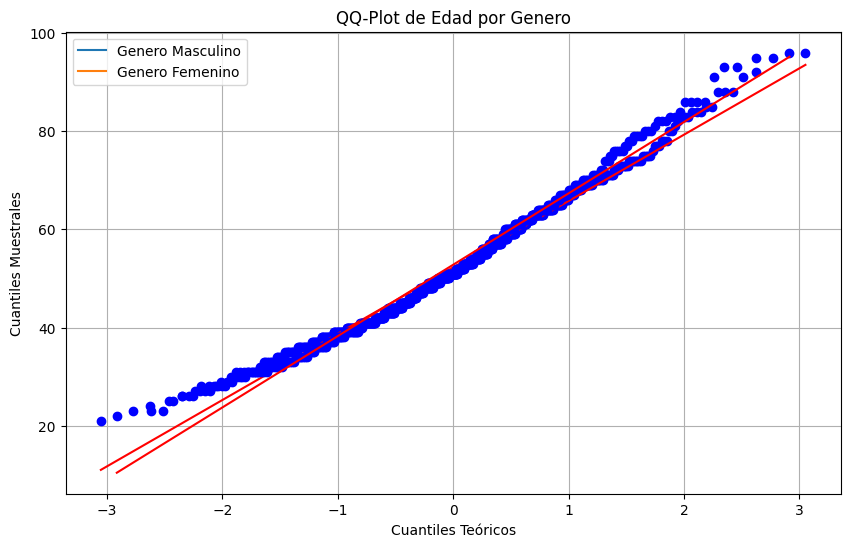

In [15]:
# Gráfico qq.plot

# Definimos función
def qq_plot_by_group(simple, Edad, Genero):
    unique_groups = simple[Genero].unique()
    plt.figure(figsize=(10, 6))

    for grp in unique_groups:
        subset = simple[simple[Genero] == grp]
        stats.probplot(subset[Edad], dist="norm", plot=plt)
        plt.plot([], [], label=f'Genero {grp}')

    plt.legend()
    plt.title(f'QQ-Plot de {Edad} por {Genero}')
    plt.xlabel('Cuantiles Teóricos')
    plt.ylabel('Cuantiles Muestrales')
    plt.grid(True)
    plt.show()

qq_plot_by_group(simple, 'Edad', 'Genero')

* Para el Genero Femenino se puede observar que los datos se aproximan a una distribución normal, mientras que, para el género Masculino, la distribución de los datos presenta colas más pesadas que una distribución normal, es decir, mayor presencia de valores extremos.

### **Paso 4**
4. Realizar los test de normalidad y de homocedasticidad sobre la variable cuantitativa por subgrupo. Plantear la hipotesis nula y la hipotesis alternativa para ambas pruebas. Interpretar los resultados. **(4ptos)**

In [16]:
import statsmodels.api as sm

In [17]:
# Test de normalidad
for grupo in simple['Genero'].unique():
    subset = simple[simple['Genero'] == grupo]['Edad']

    # Realizar el test
    stat, p_value = stats.shapiro(subset)
    print(f'Genero {grupo}: Estadístico={stat}, p-valor={p_value}')

    # Interpretación del resultado
    alpha = 0.05
    if p_value > alpha:
      print('No se rechaza la hipótesis nula (los datos siguen una distribución normal)')
    else:
      print('Se rechaza la hipótesis nula (los datos no siguen una distribución normal)')

Genero Masculino: Estadístico=0.9858149490445539, p-valor=1.1727177750383114e-05
Se rechaza la hipótesis nula (los datos no siguen una distribución normal)
Genero Femenino: Estadístico=0.9818413419986866, p-valor=8.331971673943087e-05
Se rechaza la hipótesis nula (los datos no siguen una distribución normal)


In [18]:
# Test de homocedasticidad
grupos = [simple[simple['Genero'] == grupo]['Edad'] for grupo in simple['Genero'].unique()]

# Realizar el test de Levene
stat, p_value = stats.levene(*grupos)
print(f'Estadístico: {stat}, p-valor: {p_value}')

# Interpretación del resultado
alpha = 0.05
if p_value > alpha:
    print('No se rechaza la hipótesis nula (las varianzas son iguales entre los subgrupos)')
else:
    print('Se rechaza la hipótesis nula (las varianzas no son iguales entre los subgrupos)')

Estadístico: 2.047346691362673, p-valor: 0.15278474389609895
No se rechaza la hipótesis nula (las varianzas son iguales entre los subgrupos)


### **Paso 5**
5. Hacer una prueba de comparación de medias independientes. Plantear la hipotesis nula y la hipotesis alternativa. Interpretar los resultados.  **(4ptos)**

In [20]:
# Prueba de comparación de medias independientes (U de Mann-Whitney)

# Definir los grupos
grupo_femenino = simple[simple['Genero'] == 'Femenino']['Edad']
grupo_masculino = simple[simple['Genero'] == 'Masculino']['Edad']

# Hipótesis nula: No hay diferencia en la mediana de la edad entre los grupos femenino y masculino.
# Hipótesis alternativa: Existe una diferencia en la mediana de la edad entre los grupos femenino y masculino.

# Realizar la prueba de U de Mann-Whitney
statistic, p_value = stats.mannwhitneyu(grupo_femenino, grupo_masculino)

# Imprimir los resultados
print("Estadístico U:", statistic)
print("Valor p:", p_value)

# Interpretación de los resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Existe una diferencia significativa en la mediana de la edad entre los grupos femenino y masculino.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir que existe una diferencia significativa en la mediana de la edad entre los grupos femenino y masculino.")

Estadístico U: 120345.5
Valor p: 0.7352149888426048
No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir que existe una diferencia significativa en la mediana de la edad entre los grupos femenino y masculino.
